<a href="https://colab.research.google.com/github/seven-point/1st-Frontend-Project/blob/main/GT_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gambit
!pip install nashpy

  Preparing metadata (setup.py) ... done
  Created wheel for gambit: filename=gambit-0.1.6-py3-none-any.whl size=2476 sha256=ad332b1bb95d6297ec83b1299e3478daf514217e3ed74a761e28733260b938a6
  Stored in directory: /root/.cache/pip/wheels/3b/d4/17/902204c76398cebcdb459b096054b468d1adfe0cd1b49f5d98
Successfully built gambit


In [ ]:
pip install pygambit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.9/910.9 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Exp 1  nash eql for 2 player game

import nashpy as nash
import numpy as np

# Define the payoff matrices for two players
A = np.array([[-1, -3], [0, -2]])  # Player 1's payoffs
B = np.array([[-1, 0], [-3, -2]])  # Player 2's payoffs

# Create the game
game = nash.Game(A, B)

# Compute Nash Equilibria
equilibria = list(game.support_enumeration())

print("Nash Equilibria:", equilibria)

Nash Equilibria: [(array([0., 1.]), array([0., 1.]))]


In [ ]:
# Exp 2 Saddle point 2*2

import numpy as np

def find_saddle_point(matrix):
    min_row = np.min(matrix, axis=1)  # Min values in each row
    max_col = np.max(matrix, axis=0)  # Max values in each column

    for i in range(2):
        for j in range(2):
            if matrix[i, j] == min_row[i] == max_col[j]:
                return (i, j, matrix[i, j])  # (row, col, value)

    return "No saddle point"

# Example
game_matrix = np.array([[3, 7], [2, 5]])
print(find_saddle_point(game_matrix))

(0, 0, np.int64(3))


In [ ]:
# Exp 3 NFG

class NormalFormGame:
    def __init__(self, p1_matrix, p2_matrix):
        self.p1_matrix = p1_matrix  # Payoff matrix for Player 1
        self.p2_matrix = p2_matrix  # Payoff matrix for Player 2

    def get_payoffs(self, strategy1, strategy2):
        """Returns payoffs for both players given their chosen strategies."""
        return self.p1_matrix[strategy1][strategy2], self.p2_matrix[strategy1][strategy2]

# Example: A 2x2 Normal Form Game
p1_matrix = [[3, 1], [0, 2]]  # Player 1 payoffs
p2_matrix = [[2, 0], [1, 3]]  # Player 2 payoffs

game = NormalFormGame(p1_matrix, p2_matrix)

# Get payoffs for a strategy pair (0,1) -> (Row 0, Column 1)
print("Payoffs at (0,1):", game.get_payoffs(0, 1))


Payoffs at (0,1): (1, 0)


In [ ]:
# Exp 4 	Write a program using python library(gambit) to find nash Equilibrium.
import pygambit as gambit

# Create a 2-player game with 2 strategies each
game = gambit.Game.from_arrays(
    [[3, 0], [5, 1]],  # Player 1's payoffs
    [[3, 5], [0, 1]]   # Player 2's payoffs
)

# Solve for Nash Equilibria using mixed strategy enumeration
result = gambit.nash.enummixed_solve(game)

# Print the results
print("Nash Equilibria:")
# Check if result is iterable; if not, treat as a single equilibrium or access equilibria attribute
try:
    equilibria = result.equilibria if hasattr(result, 'equilibria') else [result]
    for eq in equilibria:
        print(eq)
except AttributeError:
    # Fallback: treat result as a single equilibrium
    print(result)


(array([0.5, 0.5]), array([0.5, 0.5]))


In [ ]:
# Exp 5 	Write a program in python to form a game representation in Tree like form.

class GameTreeNode:
    def __init__(self, state, value=None):
        self.state = state  # Represents the game state
        self.value = value  # Evaluation value (useful for AI)
        self.children = []  # List of child nodes

    def add_child(self, child_node):
        """Adds a child node to the current node."""
        self.children.append(child_node)

    def display(self, level=0):
        """Recursively displays the tree structure."""
        print(" " * (level * 4) + f"State: {self.state}, Value: {self.value}")
        for child in self.children:
            child.display(level + 1)


# Example: Creating a simple game tree
if __name__ == "__main__":
    root = GameTreeNode("Start")

    node1 = GameTreeNode("Move 1")
    node2 = GameTreeNode("Move 2")

    node1_1 = GameTreeNode("Move 1-1", value=10)
    node1_2 = GameTreeNode("Move 1-2", value=-5)
    node2_1 = GameTreeNode("Move 2-1", value=7)

    root.add_child(node1)
    root.add_child(node2)

    node1.add_child(node1_1)
    node1.add_child(node1_2)
    node2.add_child(node2_1)

    # Display the tree
    root.display()


State: Start, Value: None
    State: Move 1, Value: None
        State: Move 1-1, Value: 10
        State: Move 1-2, Value: -5
    State: Move 2, Value: None
        State: Move 2-1, Value: 7


In [ ]:
# Exp 6 	Design Bayesian Game concept in Game theory using python

import itertools
import numpy as np

# Define players, types, strategies, and beliefs
players = ['Player 1', 'Player 2']
types = {
    'Player 1': [0, 1],  # Two types for Player 1
    'Player 2': [0, 1],  # Two types for Player 2
}
strategies = [0, 1]  # Two strategies per type
beliefs = {
    'Player 1': [0.5, 0.5],  # Player 1's belief about Player 2's types
    'Player 2': [0.5, 0.5],  # Player 2's belief about Player 1's types
}

# Payoff function: (type1, type2, strat1, strat2) -> (payoff1, payoff2)
payoffs = {
    (0, 0, 0, 0): (3, 2),
    (0, 0, 0, 1): (1, 4),
    (0, 0, 1, 0): (5, 1),
    (0, 0, 1, 1): (2, 3),

    (0, 1, 0, 0): (4, 3),
    (0, 1, 0, 1): (2, 2),
    (0, 1, 1, 0): (1, 5),
    (0, 1, 1, 1): (3, 4),

    (1, 0, 0, 0): (2, 1),
    (1, 0, 0, 1): (3, 5),
    (1, 0, 1, 0): (4, 2),
    (1, 0, 1, 1): (1, 3),

    (1, 1, 0, 0): (3, 4),
    (1, 1, 0, 1): (5, 2),
    (1, 1, 1, 0): (1, 3),
    (1, 1, 1, 1): (2, 1),
}

def expected_payoff(player, player_type, player_strategy, opponent_strategy_func):
    """
    Calculate expected payoff for a given player, type, and chosen strategy,
    assuming the opponent follows opponent_strategy_func(type) -> strategy.
    """
    opp = 'Player 2' if player == 'Player 1' else 'Player 1'
    opp_types = types[opp]
    opp_beliefs = beliefs[player]  # player's belief about opponent's types
    payoff_sum = 0.0
    for i, opp_type in enumerate(opp_types):
        opp_strategy = opponent_strategy_func(opp_type)
        p = opp_beliefs[i]  # probability opponent is this type
        # Get payoffs from the payoff table
        if player == 'Player 1':
            payoff = payoffs[(player_type, opp_type, player_strategy, opp_strategy)][0]
        else:
            payoff = payoffs[(opp_type, player_type, opp_strategy, player_strategy)][1]
        payoff_sum += p * payoff
    return payoff_sum

def is_best_response(player, player_type, player_strategy, opponent_strategy_func):
    """
    Check if player_strategy is a best response for the player's type
    given opponent's strategy function.
    """
    other_strategies = strategies
    current_payoff = expected_payoff(player, player_type, player_strategy, opponent_strategy_func)
    for alt_strategy in other_strategies:
        alt_payoff = expected_payoff(player, player_type, alt_strategy, opponent_strategy_func)
        if alt_payoff > current_payoff:
            return False
    return True

def check_bayesian_nash_eq(profile):
    """
    profile is a dict mapping (player, type) -> strategy
    Check if profile is a pure-strategy Bayesian Nash Equilibrium.
    """
    # Opponent strategy functions for each player
    def opp_strategy_func(player, opp_type):
        return profile[(player, opp_type)]

    # For each player and type, check best response
    for player in players:
        for p_type in types[player]:
            player_strategy = profile[(player, p_type)]
            # Opponent's strategy function
            opp = 'Player 2' if player == 'Player 1' else 'Player 1'
            def opponent_strat(t):
                return profile[(opp, t)]
            if not is_best_response(player, p_type, player_strategy, opponent_strat):
                return False
    return True

# Generate all possible pure strategy profiles for all player-types
all_profiles = list(itertools.product(strategies, repeat=len(players)*len(types['Player 1'])))  # 4 strategies total
# We map index: (P1 type0, P1 type1, P2 type0, P2 type1)
equilibria = []

for prof in all_profiles:
    profile = {
        ('Player 1', 0): prof[0],
        ('Player 1', 1): prof[1],
        ('Player 2', 0): prof[2],
        ('Player 2', 1): prof[3],
    }
    if check_bayesian_nash_eq(profile):
        equilibria.append(profile)

print("Pure Strategy Bayesian Nash Equilibria found:")
for eq in equilibria:
    print(eq)


Pure Strategy Bayesian Nash Equilibria found:
{('Player 1', 0): 0, ('Player 1', 1): 0, ('Player 2', 0): 1, ('Player 2', 1): 0}


In [ ]:
# Exp 7 zero sum game

import numpy as np
from scipy.optimize import linprog

def zero_sum_game_solver(payoff_matrix):
    num_strategies = payoff_matrix.shape[0]  # Number of strategies for Player 1

    # LP variables: [v, p1_strategy_probs...]
    # Objective: maximize v (game value)
    # linprog minimizes, so minimize -v => c = [-1, 0, 0, ..., 0]
    c = [-1] + [0] * num_strategies

    # Inequality constraints: for each column j of payoff_matrix
    # sum_i p_i * A_ij >= v  <=>  -v + sum_i p_i * A_ij >= 0
    # Represented as -v + A * p >= 0  <=>  -A * p + v <= 0 for linprog
    # We transpose payoff_matrix and multiply by -1 to get A_ub and b_ub.
    A_ub = np.hstack((
        -np.ones((num_strategies, 1)),  # Coefficient of -v for each constraint
        payoff_matrix
    ))
    b_ub = np.zeros(num_strategies)

    # Equality constraint: sum of probabilities = 1
    A_eq = [[0] + [1] * num_strategies]
    b_eq = [1]

    # Bounds: v is unrestricted, probabilities between 0 and 1
    bounds = [(None, None)] + [(0, 1)] * num_strategies

    # Solve LP
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

    if res.success:
        v = 1 / res.x[0]  # Game value
        strategy = res.x[1:] * v  # Scale probabilities to sum to 1
        return v, strategy
    else:
        return None, None

# Example usage with a 2x2 payoff matrix for Player 1
payoff_matrix = np.array([
    [3, -1],
    [5,  2]
])

value, strategy = zero_sum_game_solver(payoff_matrix)
if strategy is not None:
    print(f"Game Value: {value:.2f}")
    print(f"Optimal Mixed Strategy for Player 1: {np.round(strategy, 2)}")
else:
    print("No optimal strategy found.")



No optimal strategy found.


In [ ]:
# Exp 8  python code to develop model for first price auction and second price auction

import random
from abc import ABC, abstractmethod

class Auction(ABC):
    def __init__(self, bidders):
        self.bidders = bidders
        self.winner = None
        self.final_price = None

    @abstractmethod
    def conduct_auction(self):
        pass

class FirstPriceSealedBidAuction(Auction):
    def conduct_auction(self):
        highest_bidder = max(self.bidders, key=lambda b: b['bid'])
        self.winner = highest_bidder
        self.final_price = highest_bidder['bid']
        return self.winner, self.final_price

class SecondPriceSealedBidAuction(Auction):
    def conduct_auction(self):
        sorted_bidders = sorted(self.bidders, key=lambda b: b['bid'], reverse=True)
        self.winner = sorted_bidders[0]
        self.final_price = (
            sorted_bidders[1]['bid'] if len(sorted_bidders) > 1 else sorted_bidders[0]['bid']
        )
        return self.winner, self.final_price

# Example Usage
if __name__ == "__main__":
    bidders = [
        {'name': 'Alice', 'bid': 80},
        {'name': 'Bob', 'bid': 110},
        {'name': 'Charlie', 'bid': 85}
    ]

    # First-Price Auction
    first_price_auction = FirstPriceSealedBidAuction(bidders)
    winner, price = first_price_auction.conduct_auction()
    print(f"First-Price Auction Winner: {winner['name']} at price ${price}")

    # Second-Price Auction
    second_price_auction = SecondPriceSealedBidAuction(bidders)
    winner, price = second_price_auction.conduct_auction()
    print(f"Second-Price Auction Winner: {winner['name']} at price ${price}")


First-Price Auction Winner: Bob at price $110
Second-Price Auction Winner: Bob at price $85


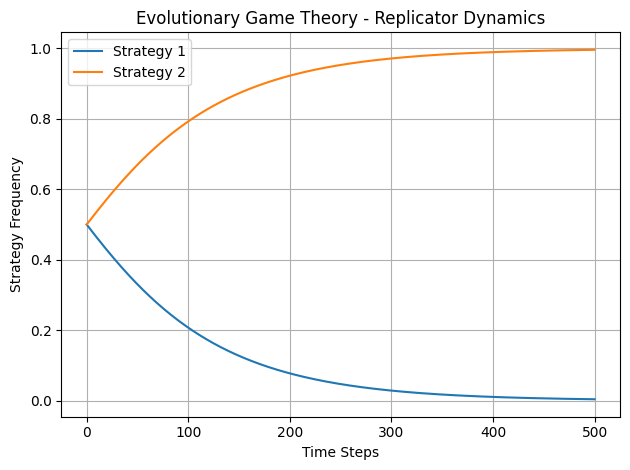

In [ ]:
# EXP 9 PYTHON Code to apply evolutionary game theory concept

import numpy as np
import matplotlib.pyplot as plt

# Define the payoff matrix for a two-strategy game
A = np.array([
    [3, 0],  # Payoff when both choose strategy 1
    [5, 1]   # Payoff when one chooses strategy 1, the other strategy 2
])

# Replicator dynamics function
def replicator_dynamics(x, A, timesteps=100, dt=0.01):
    """
    Simulate the evolution of strategy fractions in a population.

    Parameters:
    x : np.array
        Initial strategy distribution (e.g., [0.5, 0.5])
    A : np.array
        Payoff matrix
    timesteps : int
        Number of iterations
    dt : float
        Step size for time evolution

    Returns:
    np.array
        History of strategy distributions over time
    """
    x_history = [x]

    for _ in range(timesteps):
        fitness = A @ x  # Compute fitness of each strategy
        avg_fitness = np.dot(x, fitness)  # Compute average fitness
        x = x + dt * (x * (fitness - avg_fitness))  # Replicator equation
        x = np.clip(x, 0, 1)  # Ensure values remain valid
        x /= np.sum(x)  # Normalize to sum to 1
        x_history.append(x.copy())

    return np.array(x_history)

# Initial strategy distribution (50% each strategy)
x0 = np.array([0.5, 0.5])

# Simulate evolution
evolution = replicator_dynamics(x0, A, timesteps=500, dt=0.01)

# Plot the results
plt.plot(evolution[:, 0], label="Strategy 1")
plt.plot(evolution[:, 1], label="Strategy 2")
plt.xlabel("Time Steps")
plt.ylabel("Strategy Frequency")
plt.title("Evolutionary Game Theory - Replicator Dynamics")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Exp 10: Python code to understand Cooperative Games

import itertools
import math  # <-- Correct module for factorial

def shapley_value(players, coalition_values):
    """
    Compute the Shapley value for each player in a cooperative game.

    :param players: List of players
    :param coalition_values: Dictionary with coalition tuples as keys and their values as values
    :return: Dictionary of Shapley values for each player
    """
    n = len(players)
    shapley_values = {player: 0 for player in players}

    for player in players:
        for coalition in itertools.combinations(players, n):
            if player in coalition:
                S = tuple(p for p in coalition if p != player)

                # Compute marginal contribution
                weight = (math.factorial(len(S)) * math.factorial(n - len(S) - 1)) / math.factorial(n)
                marginal_contribution = coalition_values.get(coalition, 0) - coalition_values.get(S, 0)

                shapley_values[player] += weight * marginal_contribution

    return shapley_values

# Example: Three-player cooperative game
players = ['A', 'B', 'C']
coalition_values = {
    (): 0,
    ('A',): 1,
    ('B',): 2,
    ('C',): 3,
    ('A', 'B'): 5,
    ('A', 'C'): 6,
    ('B', 'C'): 8,
    ('A', 'B', 'C'): 10
}

shapley_vals = shapley_value(players, coalition_values)

print("Shapley Values:")
for player, value in shapley_vals.items():
    print(f"Player {player}: {round(value, 2)}")


Shapley Values:
Player A: 0.67
Player B: 1.33
Player C: 1.67


In [ ]:
# EXP 11 VCGAuction python code to implement mechanism of design in game theory

class VCGAuction:

    def __init__(self, bidders):
        """
        bidders: dict of {agent_name: value}
        """
        self.bidders = bidders
        self.winner = None
        self.payments = {}

    def run_auction(self):
        # Sort bidders by their value
        sorted_bidders = sorted(self.bidders.items(), key=lambda x: x[1], reverse=True)
        self.winner = sorted_bidders[0][0]
        second_price = sorted_bidders[1][1] if len(sorted_bidders) > 1 else 0

        # VCG payment rule: winner pays the externality imposed (second highest value)
        for bidder in self.bidders:
            if bidder == self.winner:
                self.payments[bidder] = second_price
            else:
                self.payments[bidder] = 0

    def get_result(self):
        return {
            'winner': self.winner,
            'payments': self.payments
        }

# Example usage
if __name__ == "__main__":
    bidders = {
        'Alice': 100,
        'Bob': 80,
        'Charlie': 60
    }

    auction = VCGAuction(bidders)
    auction.run_auction()
    result = auction.get_result()

    print("Winner:", result['winner'])
    print("Payments:")
    for bidder, payment in result['payments'].items():
        print(f" {bidder}: ${payment}")



Winner: Alice
Payments:
 Alice: $80
 Bob: $0
 Charlie: $0


In [ ]:
#  EXP 12 Develop a game theory project using python Prisoners Dillemma

import tkinter as tk
from tkinter import ttk
import random

# Payoff matrix
PAYOFFS = {
    ('C', 'C'): (3, 3),
    ('C', 'D'): (0, 5),
    ('D', 'C'): (5, 0),
    ('D', 'D'): (1, 1)
}

# Strategy functions
def always_cooperate(_, __):
    return 'C'

def always_defect(_, __):
    return 'D'

def tit_for_tat(my_history, opp_history):
    if not opp_history:
        return 'C'
    return opp_history[-1]

def random_strategy(_, __):
    return random.choice(['C', 'D'])

STRATEGIES = {
    'Always Cooperate': always_cooperate,
    'Always Defect': always_defect,
    'Tit for Tat': tit_for_tat,
    'Random': random_strategy
}

class PrisonersDilemmaGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Prisoner's Dilemma Game")

        # Histories and scores
        self.player_history = []
        self.cpu_history = []
        self.player_score = 0
        self.cpu_score = 0

        # GUI Components
        self.create_widgets()

    def create_widgets(self):
        # Dropdown for player strategy
        tk.Label(self.root, text="Select Your Strategy:").pack()
        self.strategy_var = tk.StringVar(value='Tit for Tat')
        self.strategy_dropdown = ttk.Combobox(
            self.root, textvariable=self.strategy_var,
            values=list(STRATEGIES.keys()), state="readonly"
        )
        self.strategy_dropdown.pack()

        # CPU strategy display
        self.cpu_label = tk.Label(self.root, text="CPU Strategy: Random")
        self.cpu_label.pack()

        # Play button
        self.play_button = tk.Button(self.root, text="Play Next Round",
                                     command=self.play_round)
        self.play_button.pack(pady=10)

        # History and score display
        self.result_text = tk.Text(self.root, height=10, width=50, state='disabled')
        self.result_text.pack(pady=5)

        # Reset button
        self.reset_button = tk.Button(self.root, text="Reset Game",
                                      command=self.reset_game)
        self.reset_button.pack()

    def play_round(self):
        # Get selected player strategy function
        player_strategy = STRATEGIES[self.strategy_var.get()]
        cpu_strategy = random_strategy  # fixed CPU strategy

        # Get moves
        player_move = player_strategy(self.player_history, self.cpu_history)
        cpu_move = cpu_strategy(self.cpu_history, self.player_history)

        # Get payoffs
        payoff_player, payoff_cpu = PAYOFFS[(player_move, cpu_move)]

        # Update history and scores
        self.player_history.append(player_move)
        self.cpu_history.append(cpu_move)
        self.player_score += payoff_player
        self.cpu_score += payoff_cpu

        # Update text box
        self.result_text.config(state='normal')
        self.result_text.insert(tk.END,
            f"Round {len(self.player_history)}: You - {player_move}, CPU - {cpu_move}\n")
        self.result_text.insert(tk.END,
            f"Scores → You: {self.player_score} | CPU: {self.cpu_score}\n\n")
        self.result_text.config(state='disabled')

    def reset_game(self):
        self.player_history.clear()
        self.cpu_history.clear()
        self.player_score = 0
        self.cpu_score = 0
        self.result_text.config(state='normal')
        self.result_text.delete(1.0, tk.END)
        self.result_text.config(state='disabled')

# Run GUI
if __name__ == "__main__":
    root = tk.Tk()
    game = PrisonersDilemmaGUI(root)
    root.mainloop()



TclError: no display name and no $DISPLAY environment variable

In [ ]:
# EXP 13 Bargaining model

import random

TOTAL_AMOUNT = 100
DISCOUNT_FACTOR = 0.9  # Value of money decreases each round

def bargaining_game():
    global TOTAL_AMOUNT  # Declare before using or modifying TOTAL_AMOUNT

    round_num = 1
    proposer = 'A'
    responder = 'B'

    while True:
        print(f"\nRound {round_num} - {proposer} makes an offer to {responder}")

        # Proposer makes an offer
        offer_to_A = random.randint(0, TOTAL_AMOUNT)
        offer_to_B = TOTAL_AMOUNT - offer_to_A

        if proposer == 'B':
            offer_to_A, offer_to_B = offer_to_B, offer_to_A

        print(f"Offer: A gets ${offer_to_A}, B gets ${offer_to_B}")

        # Responder decides (simulate acceptance probability)
        acceptance_threshold = 40  # Responder wants at least $40
        responder_share = offer_to_B if responder == 'B' else offer_to_A

        if responder_share >= acceptance_threshold:
            print(f"{responder} accepts the offer!")
            print(f"✅ Final Deal: A gets ${offer_to_A}, B gets ${offer_to_B}")
            break
        else:
            print(f"{responder} rejects the offer.")

        round_num += 1

        # Apply discount
        TOTAL_AMOUNT = int(TOTAL_AMOUNT * DISCOUNT_FACTOR)

        # Swap roles
        proposer, responder = responder, proposer

# Run the game
if __name__ == "__main__":
    print("Bargaining Game: Split $100 between Player A and Player B")
    bargaining_game()


Bargaining Game: Split $100 between Player A and Player B

Round 1 - A makes an offer to B
Offer: A gets $20, B gets $80
B accepts the offer!
✅ Final Deal: A gets $20, B gets $80
